In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

In [2]:
df_received = pd.read_csv('Received_Payments_Data.csv')
df_received.head()                                           #Reading the dataset :Received_Payments_Data

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [3]:
df_open = pd.read_csv(r'C:\Users\91926\Desktop\Kaushal Shah\Open_Invoice_data.csv',encoding='ISO-8859-1')
df_open.head()                                              #Reading the dataset: Open_Invoice_data

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [4]:
#Shape of Received payment Dataset
df_received.shape

(93937, 16)

In [5]:
#Shape of Open Invoice Dataset
df_open.shape

(88204, 14)

In [6]:
#info of Received Dataset
df_received.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [7]:
#Info of Open invoice Dataset
df_open.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AS_OF_DATE            88204 non-null  object 
 1   Customer Type         88204 non-null  object 
 2   Customer_Name         88204 non-null  object 
 3   Customer Account No   88201 non-null  float64
 4   Transaction Number    88195 non-null  object 
 5   Transaction Date      88204 non-null  object 
 6   Payment Term          88204 non-null  object 
 7   Due Date              88204 non-null  object 
 8   Transaction Currency  88204 non-null  object 
 9   Local Amount          88204 non-null  object 
 10  Transaction Class     88204 non-null  object 
 11  AGE                   88204 non-null  int64  
 12  USD Amount            88204 non-null  object 
 13  INV_CREATION_DATE     88204 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 9.4+ MB


In [8]:
#Null values checking
df_received.isnull().sum()

RECEIPT_METHOD            0
CUSTOMER_NAME             0
CUSTOMER_NUMBER           0
RECEIPT_DOC_NO           29
RECEIPT_DATE              0
CLASS                     0
CURRENCY_CODE             0
Local Amount              0
USD Amount                0
INVOICE_ALLOCATED         0
INVOICE_CREATION_DATE     0
DUE_DATE                  0
PAYMENT_TERM              0
INVOICE_CLASS             0
INVOICE_CURRENCY_CODE     0
INVOICE_TYPE              0
dtype: int64

In [9]:
df_open.isnull().sum()

AS_OF_DATE              0
Customer Type           0
Customer_Name           0
Customer Account No     3
Transaction Number      9
Transaction Date        0
Payment Term            0
Due Date                0
Transaction Currency    0
Local Amount            0
Transaction Class       0
AGE                     0
USD Amount              0
INV_CREATION_DATE       0
dtype: int64

In [10]:
#Lets map the data to convert them into numerical for machine learning model building

In [11]:
r_m = {'WIRE':0,'AP/AR Netting':1,'CHEQUE':2,'CASH':3,'I/C WIRE':4,'PDC':5,'I/C Check':6,'I/C CASH':7}
df_received['RECEIPT_METHOD']=df_received['RECEIPT_METHOD'].map(r_m)

In [12]:
c_m = {'PMT':1}
df_received['CLASS'] = df_received['CLASS'].map(c_m)

In [13]:
cc_m = {'SAR':0,'AED':1,'USD':2,'EUR':3,'GBP':4,'BHD':5,'KWD':6,'QAR':7}
df_received['CURRENCY_CODE']=df_received['CURRENCY_CODE'].map(cc_m)

In [14]:
ic_m = {'INV':0,'CM':1,'DM':2}
df_received['INVOICE_CLASS']=df_received['INVOICE_CLASS'].map(ic_m)

In [15]:
icc_m = {'SAR':0,'AED':1,'USD':2,'EUR':3,'GBP':4,'BHD':5,'KWD':6,'QAR':7,'JOD':8,'ZAR':9}
df_received['INVOICE_CURRENCY_CODE']=df_received['INVOICE_CURRENCY_CODE'].map(icc_m)

In [16]:
it_m = {'Goods':0,'Non Goods':1}
df_received['INVOICE_TYPE']=df_received['INVOICE_TYPE'].map(it_m)

In [17]:
###Converting Columns into Datetime function for Target variable finding

In [18]:
df_received['RECEIPT_DATE'] = pd.to_datetime(df_received['RECEIPT_DATE'])
df_received['INVOICE_CREATION_DATE'] = pd.to_datetime(df_received['INVOICE_CREATION_DATE'])
df_received['DUE_DATE'] = pd.to_datetime(df_received['DUE_DATE'])

In [19]:
df_received['PAYMENT_TERM'] = pd.to_numeric(df_received['PAYMENT_TERM'],errors='coerce')

In [20]:
df_received.drop(['INVOICE_ALLOCATED','RECEIPT_DOC_NO','CUSTOMER_NAME'],axis=1,inplace=True)

In [21]:
df_received.head()

,RECEIPT_METHOD,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,0,37403,2021-04-20,1,2,370990.92,101018.63040,2020-11-02,2020-12-30,NaN,0,1,1
1,0,4003,2021-01-31,1,0,183750.00,48990.21133,2020-12-29,2021-01-28,NaN,0,0,1
2,0,4003,2021-01-31,1,0,157500.00,41991.60971,2021-01-30,2021-03-01,NaN,0,0,1
3,0,1409,2021-01-31,1,0,157500.00,41991.60971,2020-12-15,2021-01-14,NaN,0,0,1
4,0,4003,2021-01-31,1,0,157500.00,41991.60971,2020-12-15,2021-01-14,NaN,0,0,1


In [22]:
df_received.isnull().sum()

RECEIPT_METHOD               0
CUSTOMER_NUMBER              0
RECEIPT_DATE                 0
CLASS                        0
CURRENCY_CODE                0
Local Amount                 0
USD Amount                   0
INVOICE_CREATION_DATE        0
DUE_DATE                     0
PAYMENT_TERM             93937
INVOICE_CLASS                0
INVOICE_CURRENCY_CODE        0
INVOICE_TYPE                 0
dtype: int64

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


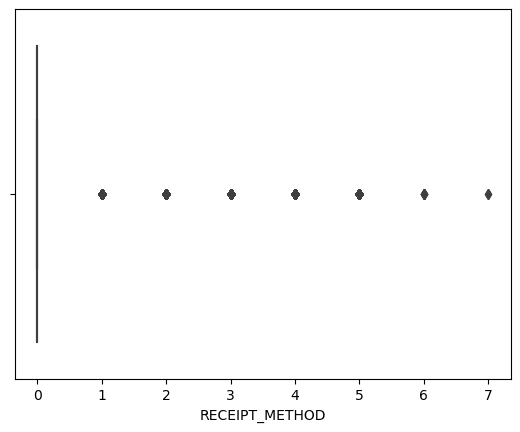

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


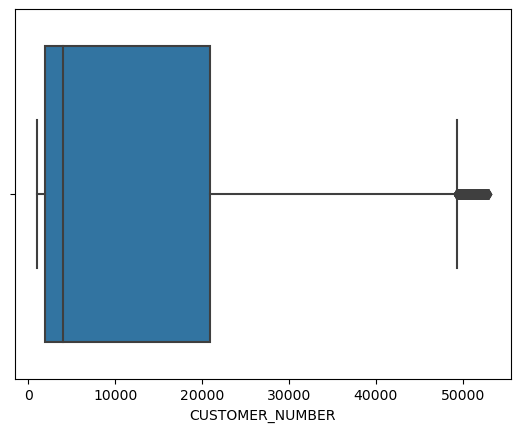

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


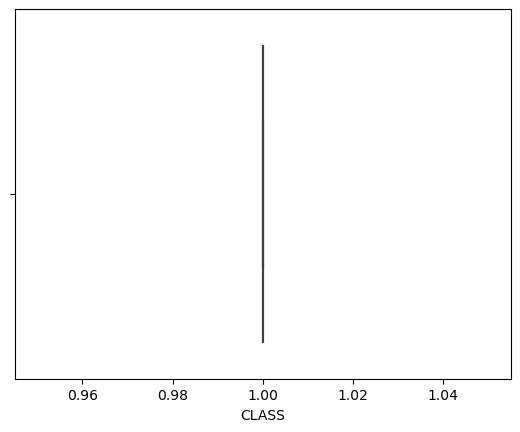

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


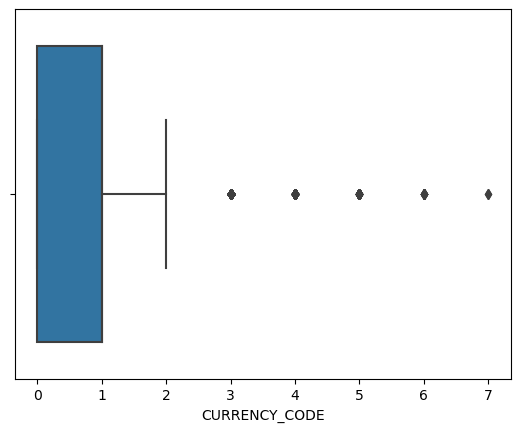

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


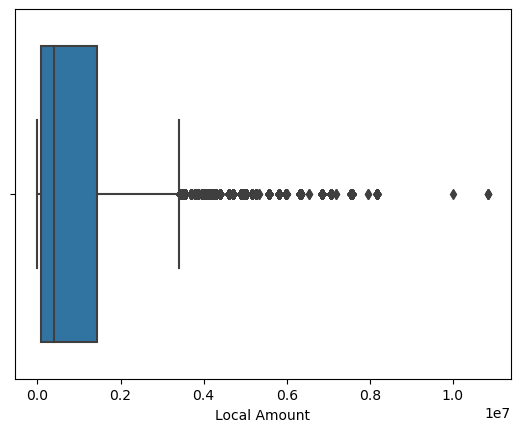

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


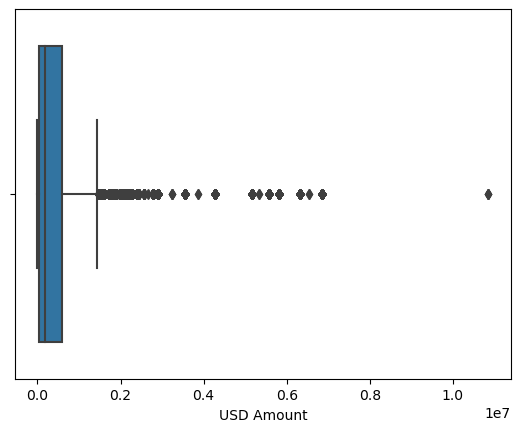

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


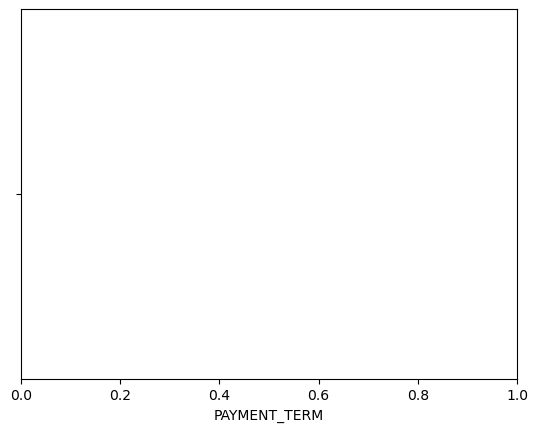

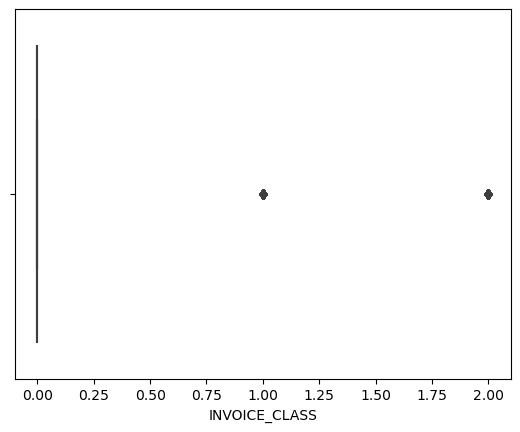

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


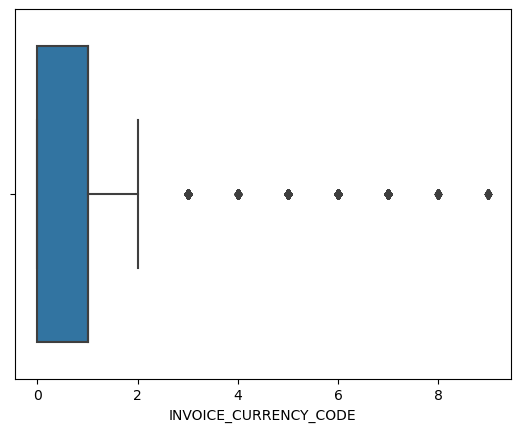

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


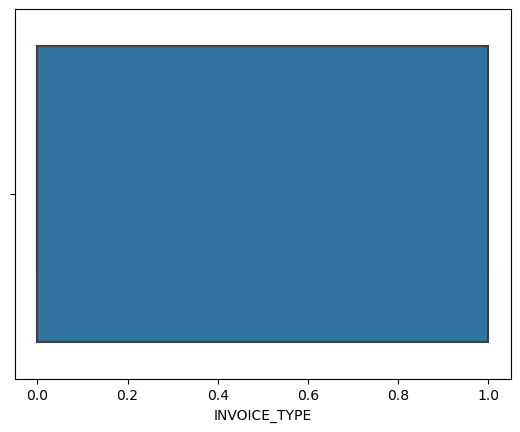

In [23]:
for i in df_received.select_dtypes(include=np.number):
    sns.boxplot(df_received[i])
    plt.show()

In [24]:
#Lets Convert Open invoice dataset

In [25]:
df_open.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AS_OF_DATE            88204 non-null  object 
 1   Customer Type         88204 non-null  object 
 2   Customer_Name         88204 non-null  object 
 3   Customer Account No   88201 non-null  float64
 4   Transaction Number    88195 non-null  object 
 5   Transaction Date      88204 non-null  object 
 6   Payment Term          88204 non-null  object 
 7   Due Date              88204 non-null  object 
 8   Transaction Currency  88204 non-null  object 
 9   Local Amount          88204 non-null  object 
 10  Transaction Class     88204 non-null  object 
 11  AGE                   88204 non-null  int64  
 12  USD Amount            88204 non-null  object 
 13  INV_CREATION_DATE     88204 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 9.4+ MB


In [26]:
df_open.tail(10)

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
88194,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,165220000003,05/01/2022,Immediate,05/01/2022,AED,-45,CREDIT NOTE,90,-45,1/5/2022 13:05
88195,04-APR-2022 01:07:01,Related Party,COTY Corp,4017.0,165210000106,12/07/2021,120 Days from Inv Date,09/11/2021,USD,"1,385",INVOICE,147,"1,385",7/12/2021 11:07
88196,04-APR-2022 01:07:01,Related Party,COTY Corp,4017.0,165210000193,01/11/2021,120 Days from Inv Date,01/03/2022,USD,946,INVOICE,35,946,11/1/2021 9:23
88197,04-APR-2022 01:07:01,Related Party,FITR Corp,1279.0,165210000029,22/03/2021,75 Days from Inv Date,05/06/2021,USD,"1,199",INVOICE,304,"1,199",3/22/2021 18:20
88198,04-APR-2022 01:07:01,Related Party,FITR Corp,1279.0,165210000030,22/03/2021,75 Days from Inv Date,05/06/2021,USD,914,INVOICE,304,914,3/22/2021 18:34
88199,04-APR-2022 01:07:01,Related Party,FITR Corp,1279.0,165210000125,01/08/2021,Immediate,01/08/2021,USD,"-1,199",CREDIT NOTE,247,"-1,199",8/1/2021 15:33
88200,04-APR-2022 01:07:01,Related Party,FITR Corp,1279.0,165210000126,01/08/2021,Immediate,01/08/2021,USD,-914,CREDIT NOTE,247,-914,8/1/2021 15:33
88201,04-APR-2022 01:07:01,Related Party,MCT Corp,1825.0,165220000011,20/01/2022,30 Days from EOM,28/02/2022,AED,"12,866",INVOICE,36,"12,866",1/20/2022 10:41
88202,04-APR-2022 01:07:01,Related Party,QATA Corp,2273.0,165220000007,18/01/2022,60 Days from Inv Date,19/03/2022,USD,"18,118",INVOICE,17,"18,118",1/18/2022 9:51
88203,04-APR-2022 01:07:01,Related Party,QATA Corp,2273.0,165220000008,18/01/2022,60 Days from Inv Date,19/03/2022,USD,"18,499",INVOICE,17,"18,499",1/18/2022 10:22


In [27]:
###Converting Columns into Datetime function for Target variable finding

In [28]:
df_open['AS_OF_DATE'] = pd.to_datetime(df_open['AS_OF_DATE'])
df_open['INV_CREATION_DATE'] = pd.to_datetime(df_open['INV_CREATION_DATE'])
df_open['Due Date'] = pd.to_datetime(df_open['Due Date'])
df_open['Transaction Date']= pd.to_datetime(df_open['Transaction Date'])

C:\Users\91926\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\91926\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\91926\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\91926\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30/04/2022' in DD/MM/YYYY format. Provide format or specif

In [29]:
df_open['Customer Type'].value_counts()

3rd Party                45282
Related Party            42919
Unidentified Receipts        3
Name: Customer Type, dtype: int64

In [30]:
ct_m = {'3rd Party':0,'Related Party':1,'Unidentified Receipts':2}
df_open['Customer Type']=df_open['Customer Type'].map(ct_m)

In [31]:
tc_m = {'INVOICE':0,'CREDIT NOTE':1,'PAYMENT':2,'DEBIT NOTE':3}
df_open['Transaction Class']=df_open['Transaction Class'].map(tc_m)

In [32]:
df_open['Transaction Currency'].value_counts()

SAR    39228
AED    22066
USD    13699
KWD     6409
QAR     2552
BHD     1786
EUR     1559
EGP      784
JOD       46
GBP       45
OMR       20
MAD        3
HKD        2
SGD        2
ZAR        2
CNY        1
Name: Transaction Currency, dtype: int64

In [33]:
trc_m = {'SAR':0,'AED':1,'USD':2,'EUR':3,'GBP':4,'BHD':5,'KWD':6,'QAR':7,'EGP':8,'JOD':9,'GBP':10,'OMR':11,
        'MAD':12,'HKD':13,'SGD':14,'ZAR':15,'CNY':16}
df_open['Transaction Currency'] = df_open['Transaction Currency'].map(trc_m)

In [34]:
df_open.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AS_OF_DATE            88204 non-null  datetime64[ns]
 1   Customer Type         88204 non-null  int64         
 2   Customer_Name         88204 non-null  object        
 3   Customer Account No   88201 non-null  float64       
 4   Transaction Number    88195 non-null  object        
 5   Transaction Date      88204 non-null  datetime64[ns]
 6   Payment Term          88204 non-null  object        
 7   Due Date              88204 non-null  datetime64[ns]
 8   Transaction Currency  88204 non-null  int64         
 9   Local Amount          88204 non-null  object        
 10  Transaction Class     88204 non-null  int64         
 11  AGE                   88204 non-null  int64         
 12  USD Amount            88204 non-null  object        
 13  INV_CREATION_DAT

In [35]:
df_open.drop(['Customer_Name','AS_OF_DATE','AGE'],axis=1,inplace=True)

In [36]:
df_open.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Customer Type         88204 non-null  int64         
 1   Customer Account No   88201 non-null  float64       
 2   Transaction Number    88195 non-null  object        
 3   Transaction Date      88204 non-null  datetime64[ns]
 4   Payment Term          88204 non-null  object        
 5   Due Date              88204 non-null  datetime64[ns]
 6   Transaction Currency  88204 non-null  int64         
 7   Local Amount          88204 non-null  object        
 8   Transaction Class     88204 non-null  int64         
 9   USD Amount            88204 non-null  object        
 10  INV_CREATION_DATE     88204 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(4)
memory usage: 7.4+ MB


In [37]:
##Droppoing and Converting different columns to proceed with data modeling

In [38]:
df_open.drop(['Transaction Number','INV_CREATION_DATE'],axis=1,inplace=True)

In [39]:
df_open.set_index('Customer Type',inplace=True)

In [40]:
df_open['Local Amount'] = df_open['Local Amount'].str.replace('-','').str.replace(',','').astype(float)

In [41]:
df_open['Payment Term days'] = (df_open['Due Date']- df_open['Transaction Date']).dt.days

In [42]:
df_open['USD Amount'] = df_open['USD Amount'].str.replace('-','').str.replace(',','').astype(float)

In [43]:
df_open.head()

,Customer Account No,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,USD Amount,Payment Term days
Customer Type,,,,,,,,,
0,49144.0,2021-12-21,Immediate,2021-12-21,1,3088.0,1,3088.0,0
1,23152.0,2022-01-02,30 Days from Inv Date,2022-03-03,2,2000.0,0,2000.0,60
1,23152.0,2022-03-24,30 Days from Inv Date,2022-04-23,2,2000.0,0,2000.0,30
1,23312.0,2022-04-01,15 Days from Inv Date,2022-01-19,1,2415.0,0,2415.0,-72
1,7530.0,2022-03-03,30 Days from EOM,2022-04-30,1,3800.0,0,3800.0,58


In [44]:
df_received['PAYMENT_TERM_DAYS'] = (df_received['DUE_DATE']-df_received['INVOICE_CREATION_DATE']).dt.days

In [45]:
df_received['Late Payment'] = (df_received['RECEIPT_DATE']>df_received['DUE_DATE']).astype(int)

### Customer Segmentation based on average payment time and standard deviation

In [46]:
Cust_Payment_stats = df_received.groupby('CUSTOMER_NUMBER').agg({'PAYMENT_TERM_DAYS':['mean','std']}).reset_index()
Cust_Payment_stats.columns = ['CUSTOMER_NUMBER','Avg Payment Term','Std Payment Term']

In [47]:
Cust_Payment_stats.head()

,CUSTOMER_NUMBER,Avg Payment Term,Std Payment Term
0,1044,32.766594,84.586212
1,1076,29.200000,4.417706
2,1146,73.316667,12.528600
3,1154,34.127660,41.741713
4,1192,37.851852,17.649807


In [48]:
Cust_Payment_stats.isnull().sum()

CUSTOMER_NUMBER       0
Avg Payment Term      0
Std Payment Term    156
dtype: int64

In [49]:
Cust_Payment_stats.fillna(0, inplace=True)

In [50]:
Cust_Payment_stats.isnull().sum()

CUSTOMER_NUMBER     0
Avg Payment Term    0
Std Payment Term    0
dtype: int64

In [51]:
scaler = StandardScaler()
X = Cust_Payment_stats[['Avg Payment Term', 'Std Payment Term']]
X_scaled = scaler.fit_transform(X)

In [52]:
kmeans = KMeans(n_clusters=3, random_state=42)
Cust_Payment_stats['Cluster'] = kmeans.fit_predict(X_scaled)

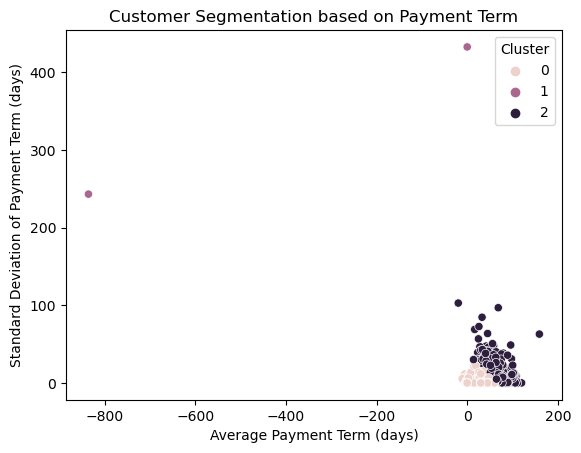

In [53]:
sns.scatterplot(data=Cust_Payment_stats, x='Avg Payment Term', y='Std Payment Term', hue='Cluster')
plt.title('Customer Segmentation based on Payment Term')
plt.xlabel('Average Payment Term (days)')
plt.ylabel('Standard Deviation of Payment Term (days)')
plt.show()

In [54]:
df_open.head()

,Customer Account No,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,USD Amount,Payment Term days
Customer Type,,,,,,,,,
0,49144.0,2021-12-21,Immediate,2021-12-21,1,3088.0,1,3088.0,0
1,23152.0,2022-01-02,30 Days from Inv Date,2022-03-03,2,2000.0,0,2000.0,60
1,23152.0,2022-03-24,30 Days from Inv Date,2022-04-23,2,2000.0,0,2000.0,30
1,23312.0,2022-04-01,15 Days from Inv Date,2022-01-19,1,2415.0,0,2415.0,-72
1,7530.0,2022-03-03,30 Days from EOM,2022-04-30,1,3800.0,0,3800.0,58


In [55]:
df_received.head()

,RECEIPT_METHOD,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,PAYMENT_TERM_DAYS,Late Payment
0,0,37403,2021-04-20,1,2,370990.92,101018.63040,2020-11-02,2020-12-30,NaN,0,1,1,58,1
1,0,4003,2021-01-31,1,0,183750.00,48990.21133,2020-12-29,2021-01-28,NaN,0,0,1,30,1
2,0,4003,2021-01-31,1,0,157500.00,41991.60971,2021-01-30,2021-03-01,NaN,0,0,1,30,0
3,0,1409,2021-01-31,1,0,157500.00,41991.60971,2020-12-15,2021-01-14,NaN,0,0,1,30,1
4,0,4003,2021-01-31,1,0,157500.00,41991.60971,2020-12-15,2021-01-14,NaN,0,0,1,30,1


In [56]:
df_received.drop(['PAYMENT_TERM','RECEIPT_DATE','INVOICE_CREATION_DATE','DUE_DATE'],axis=1,inplace=True)

In [57]:
df_received.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  int64  
 1   CUSTOMER_NUMBER        93937 non-null  int64  
 2   CLASS                  93937 non-null  int64  
 3   CURRENCY_CODE          93937 non-null  int64  
 4   Local Amount           93937 non-null  float64
 5   USD Amount             93937 non-null  float64
 6   INVOICE_CLASS          93937 non-null  int64  
 7   INVOICE_CURRENCY_CODE  93937 non-null  int64  
 8   INVOICE_TYPE           93937 non-null  int64  
 9   PAYMENT_TERM_DAYS      93937 non-null  int64  
 10  Late Payment           93937 non-null  int32  
dtypes: float64(2), int32(1), int64(8)
memory usage: 7.5 MB


In [58]:
df_open.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88204 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Customer Account No   88201 non-null  float64       
 1   Transaction Date      88204 non-null  datetime64[ns]
 2   Payment Term          88204 non-null  object        
 3   Due Date              88204 non-null  datetime64[ns]
 4   Transaction Currency  88204 non-null  int64         
 5   Local Amount          88204 non-null  float64       
 6   Transaction Class     88204 non-null  int64         
 7   USD Amount            88204 non-null  float64       
 8   Payment Term days     88204 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(3), object(1)
memory usage: 6.7+ MB


In [59]:
df_open.drop(['Transaction Date','Due Date','Payment Term'],axis=1,inplace=True)

#### Data Visualization and Outlier Treatments

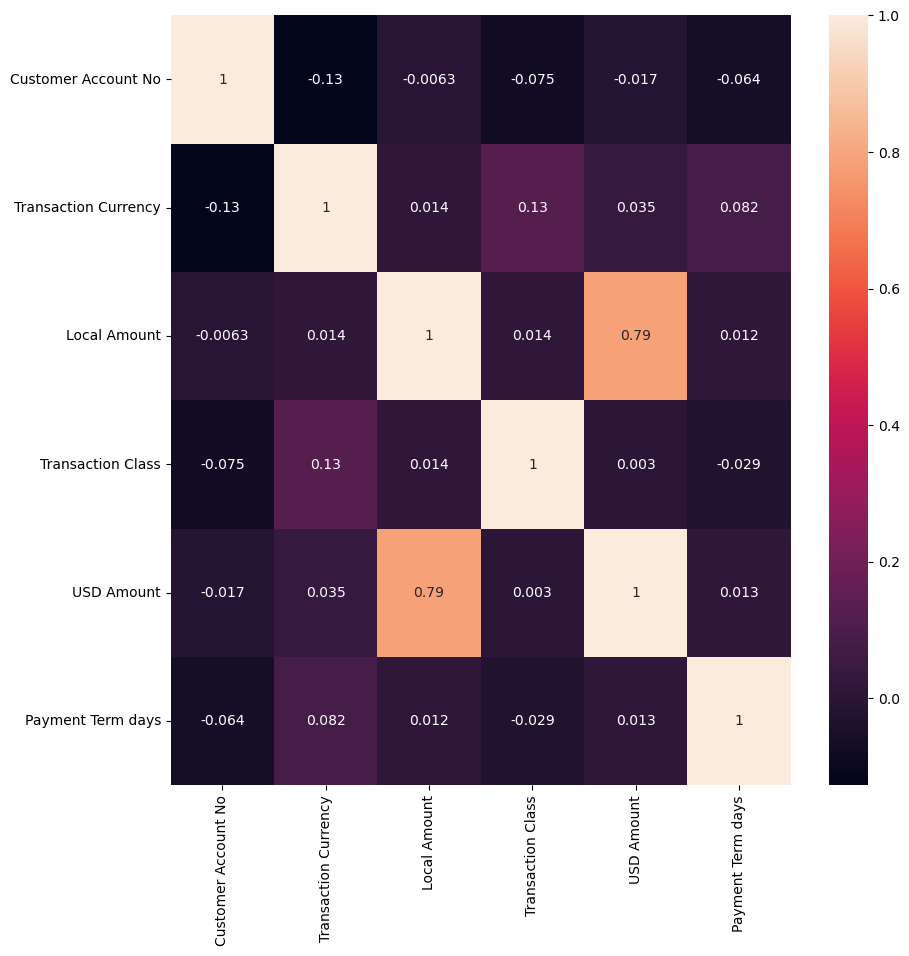

In [60]:
#CORRELATION THROUGH HEATMAP
plt.figure(figsize=(10,10))
sns.heatmap(df_open.corr(),annot=True)
plt.show()

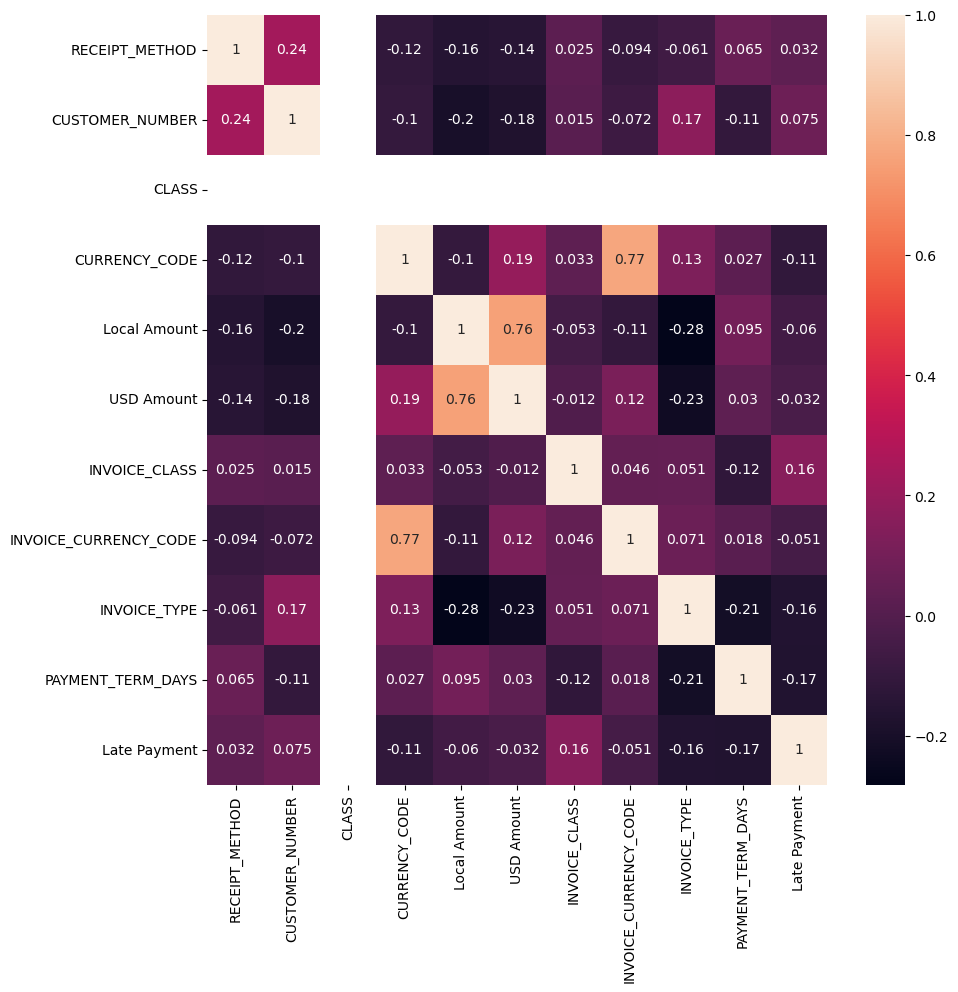

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(df_received.corr(),annot=True)
plt.show()

#### Outlier treatment

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


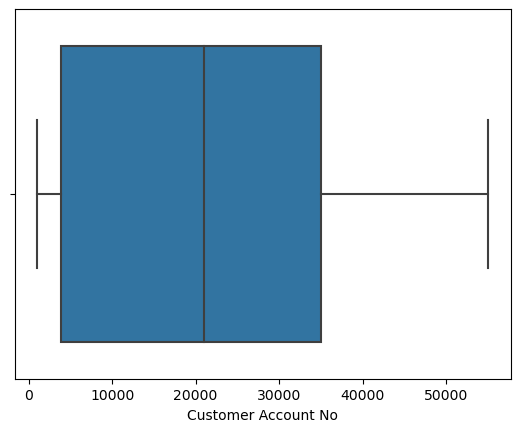

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


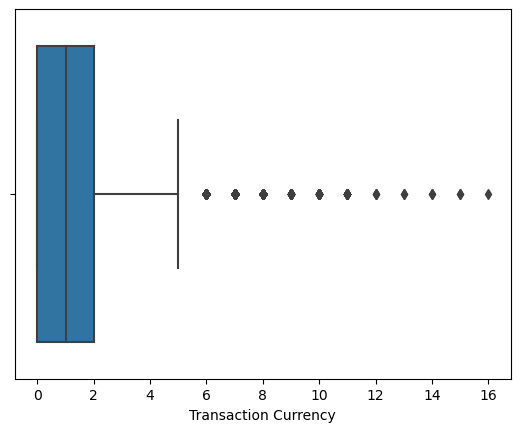

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


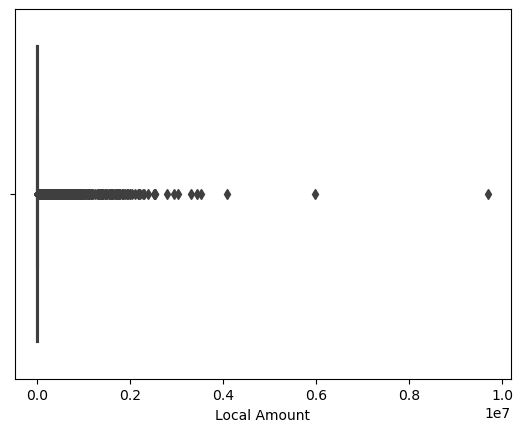

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


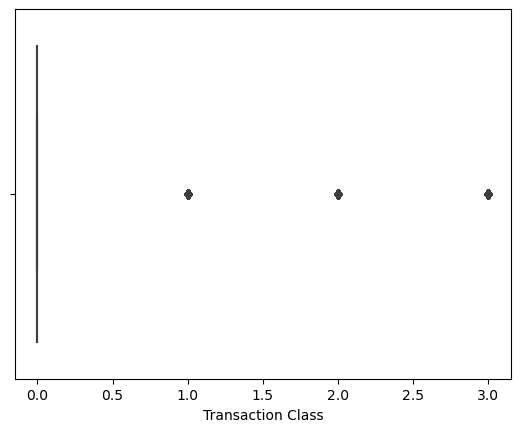

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


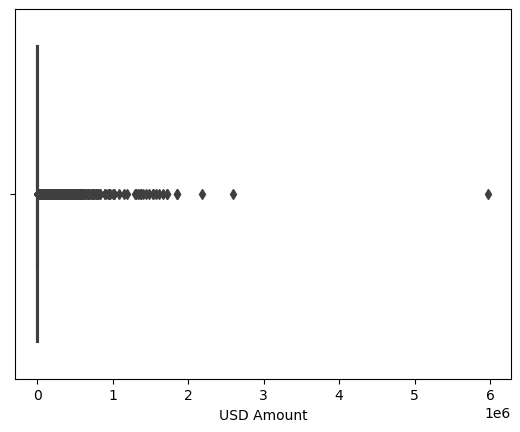

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


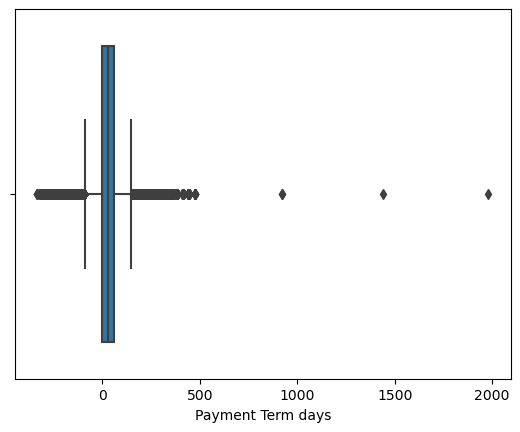

In [62]:
for i in df_open.select_dtypes(include=np.number):
    sns.boxplot(df_open[i])
    plt.show()

In [63]:
q1 = df_open.quantile(0.25)
q3 = df_open.quantile(0.75)
iqr = q3 - q1
ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr
df_open = df_open[~((df_open<ll)|(df_open>ul)).any(axis=1)]

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


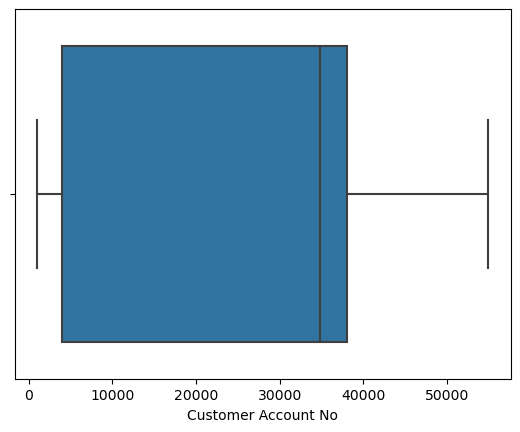

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


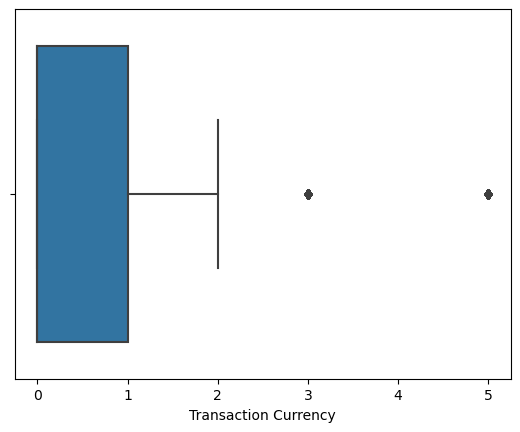

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


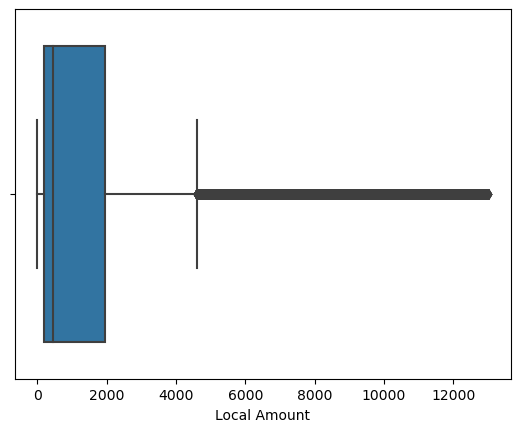

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


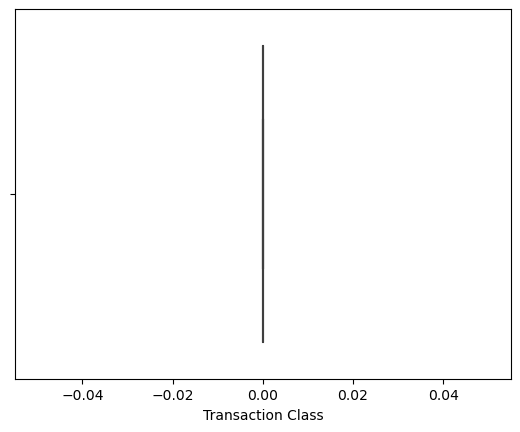

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


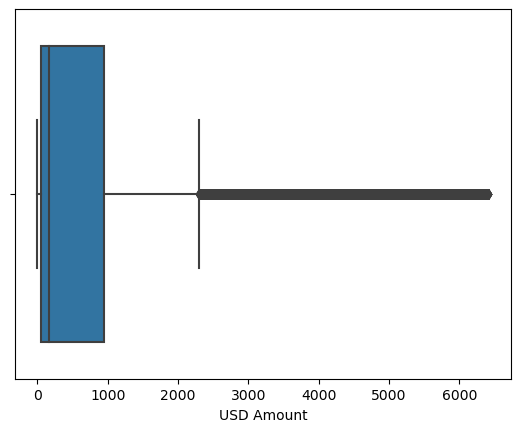

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


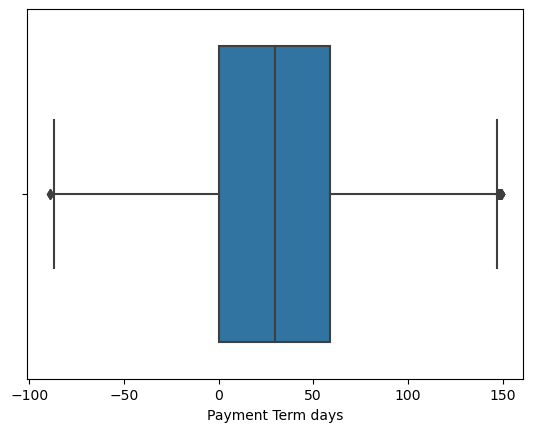

In [64]:
for i in df_open.select_dtypes(include=np.number):
    sns.boxplot(df_open[i])
    plt.show()

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


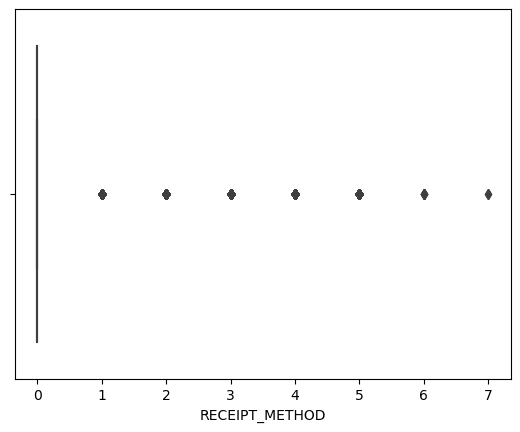

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


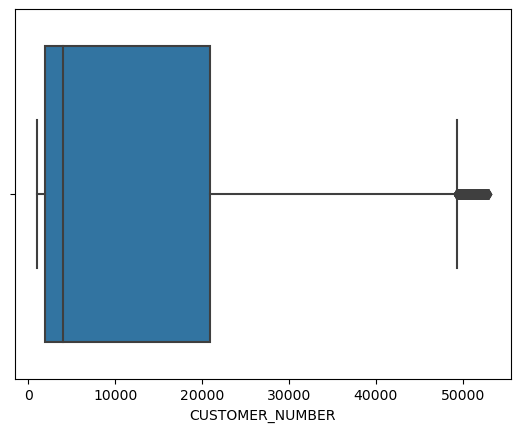

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


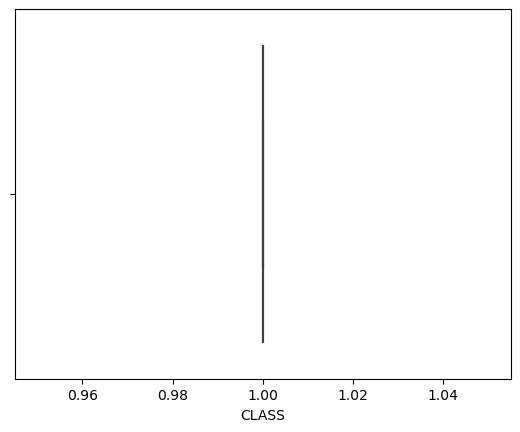

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


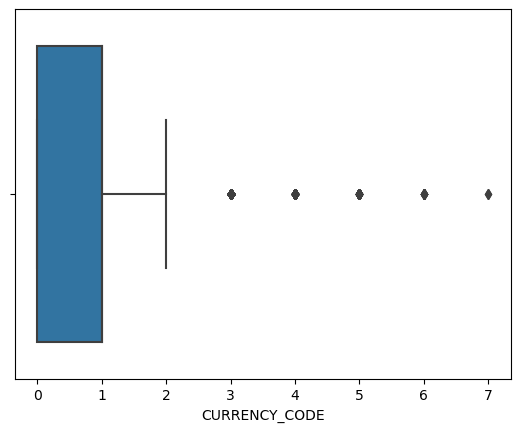

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


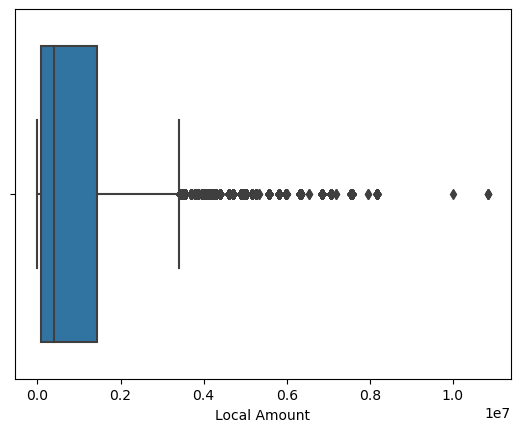

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


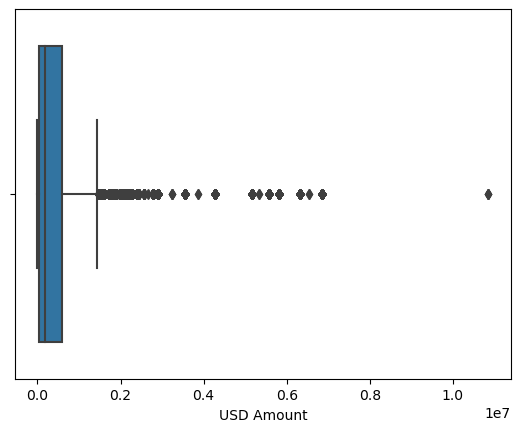

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


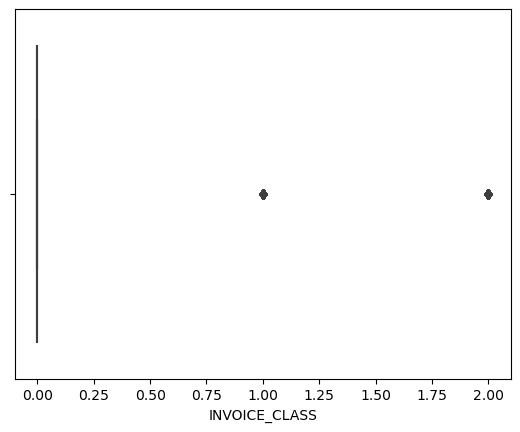

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


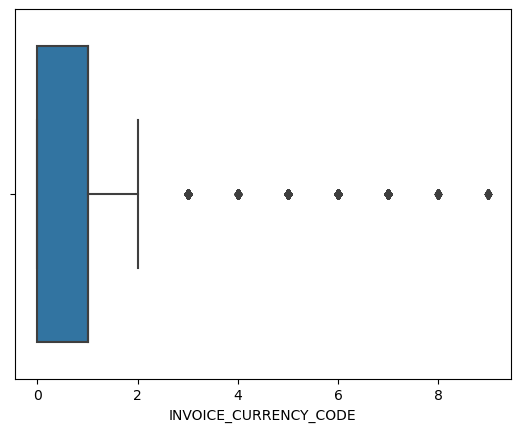

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


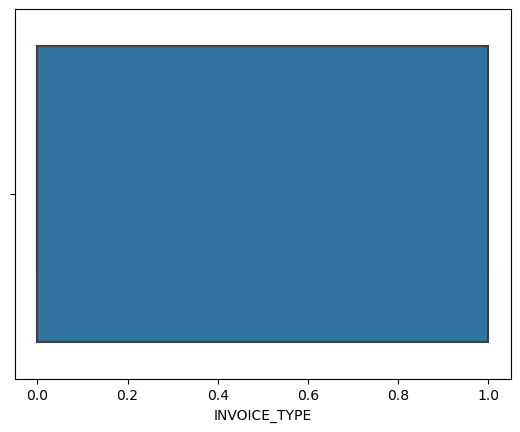

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


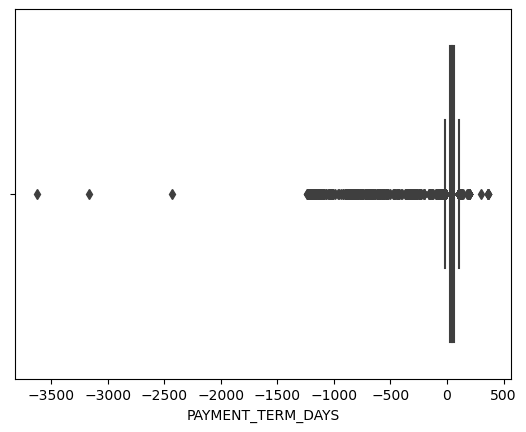

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


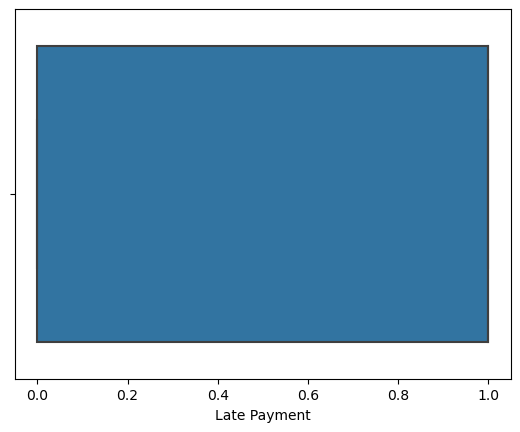

In [65]:
for i in df_received.select_dtypes(include=np.number):
    sns.boxplot(df_received[i])
    plt.show()

In [66]:
q1 = df_received.quantile(0.25)
q3 = df_received.quantile(0.75)
iqr = q3 - q1
Ll = q1 - 1.5*iqr
Ul = q3 + 1.5*iqr
df_received = df_received[~((df_received<Ll)|(df_received>Ul)).any(axis=1)]

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


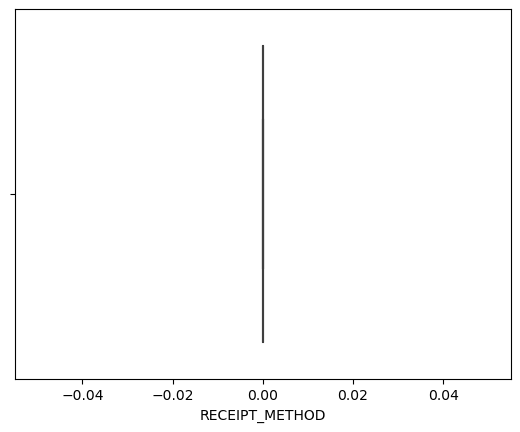

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


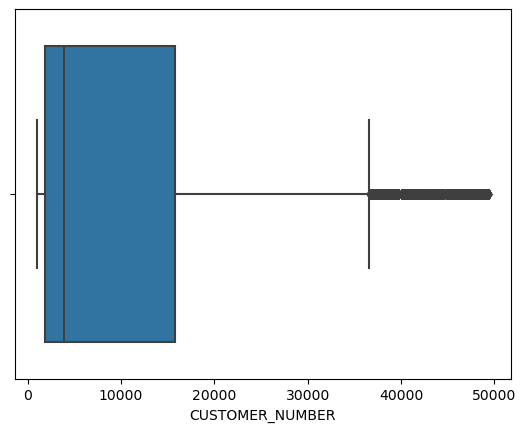

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


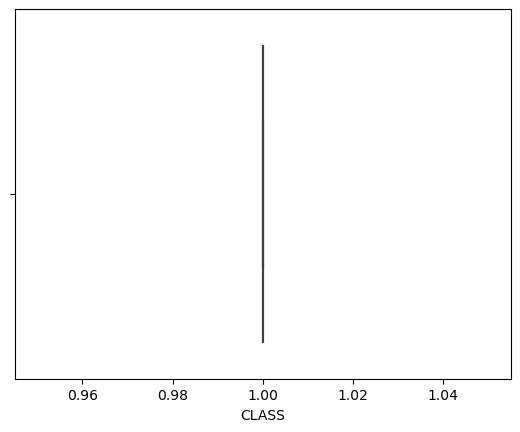

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


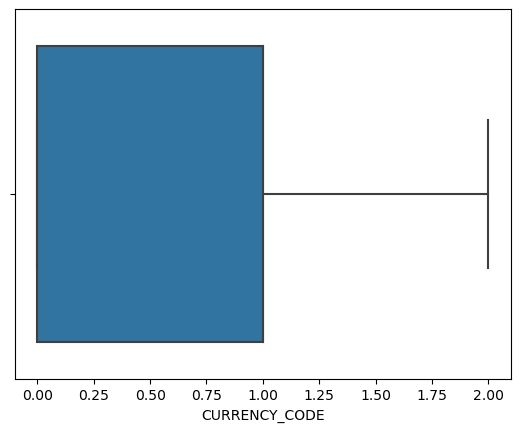

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


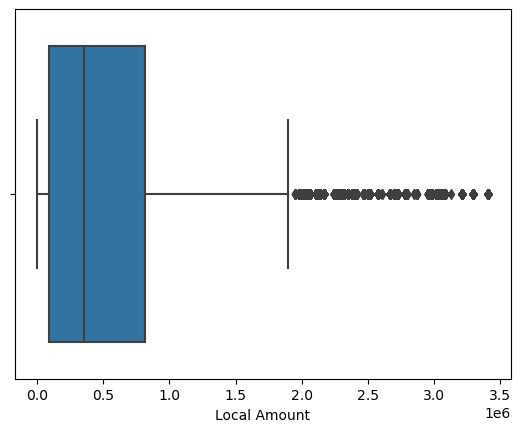

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


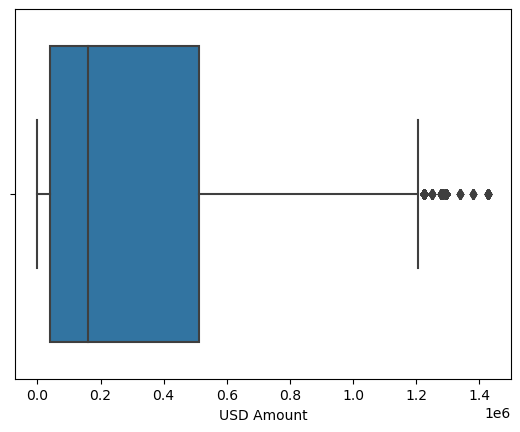

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


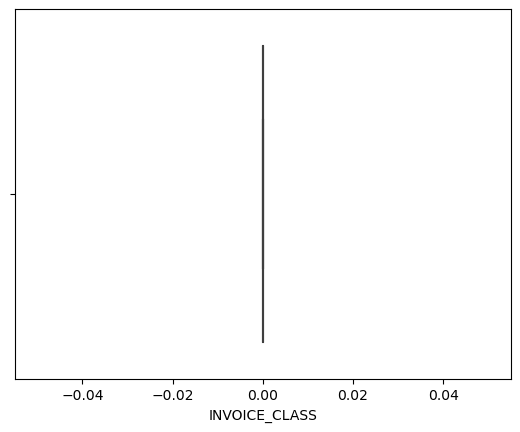

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


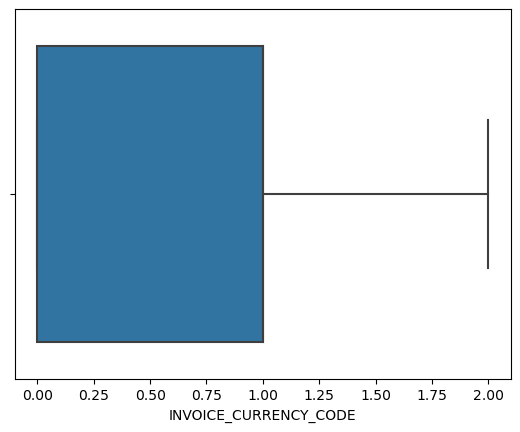

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


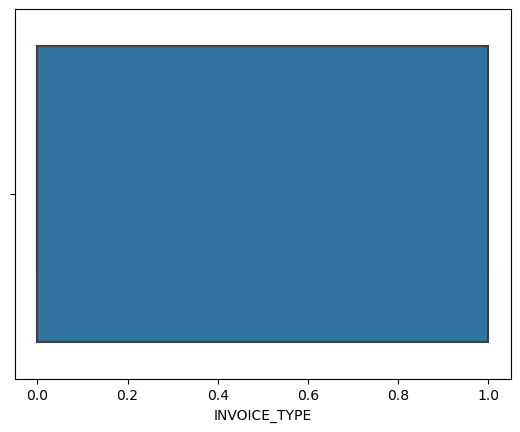

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


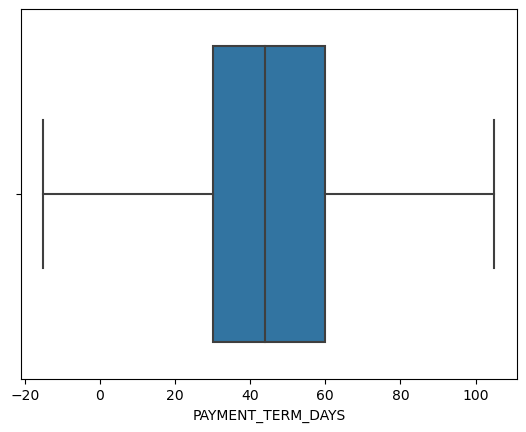

C:\Users\91926\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


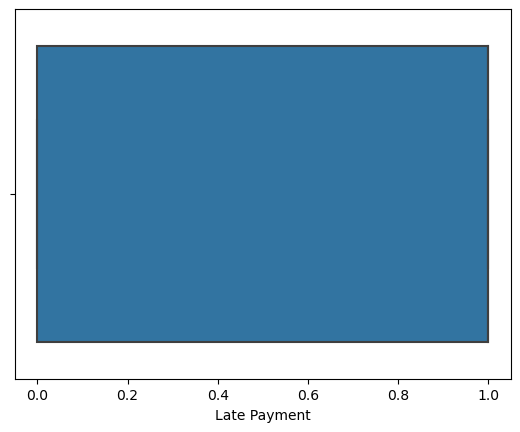

In [67]:
for i in df_received.select_dtypes(include=np.number):
    sns.boxplot(df_received[i])
    plt.show()

### Dataframe merging with clusterd dataframe 

In [68]:
df_received = df_received.merge(Cust_Payment_stats[['CUSTOMER_NUMBER', 'Cluster']], on='CUSTOMER_NUMBER', how='left')

In [69]:
df_received.head()

,RECEIPT_METHOD,CUSTOMER_NUMBER,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,PAYMENT_TERM_DAYS,Late Payment,Cluster
0,0,37403,1,2,370990.92,101018.63040,0,1,1,58,1,2
1,0,4003,1,0,183750.00,48990.21133,0,0,1,30,1,2
2,0,4003,1,0,157500.00,41991.60971,0,0,1,30,0,2
3,0,1409,1,0,157500.00,41991.60971,0,0,1,30,1,2
4,0,4003,1,0,157500.00,41991.60971,0,0,1,30,1,2


### Model Building and Feature Selection

In [71]:
features = ['USD Amount', 'PAYMENT_TERM_DAYS', 'Cluster']

In [ ]:
#Train Test Split of the dataset

In [72]:
X = df_received[features]
y = df_received['Late Payment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Random Forest Classifier

In [73]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
y_pred = rf_classifier.predict(X_test)
print("Testing Accuracy")
print(rf_classifier.score(X_test,y_test))
print("Training Accuracy")
print(rf_classifier.score(X_train,y_train))

Testing Accuracy
0.8786965376782078
Training Accuracy
0.9408529879017475


In [75]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3343  854]
 [ 635 7443]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      4197
           1       0.90      0.92      0.91      8078

    accuracy                           0.88     12275
   macro avg       0.87      0.86      0.86     12275
weighted avg       0.88      0.88      0.88     12275



### Logistic Regression

In [76]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [77]:
y_pred1 = lr.predict(X_test)
print("Testing Accuracy")
print(lr.score(X_test,y_test))
print("Training Accuracy")
print(lr.score(X_train,y_train))

Testing Accuracy
0.6580040733197556
Training Accuracy
0.6544462096215732


In [78]:
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[   0 4197]
 [   1 8077]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4197
           1       0.66      1.00      0.79      8078

    accuracy                           0.66     12275
   macro avg       0.33      0.50      0.40     12275
weighted avg       0.43      0.66      0.52     12275



In [79]:
def roc_plot(model,X,y,label):
    # K Nearest Neighbors
    y_pred = lr.predict_proba(X)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y, y_pred)

    # add the AUC score to the plot
    auc_score = roc_auc_score(y, y_pred)

    # plot the ROC curve
    plt.plot(fpr, tpr, label=label+' (AUC Score = %0.4f)' % auc_score)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    
    # set the position of legend
    plt.legend(loc = 'lower right')

    # plot the grid
    plt.grid(True)

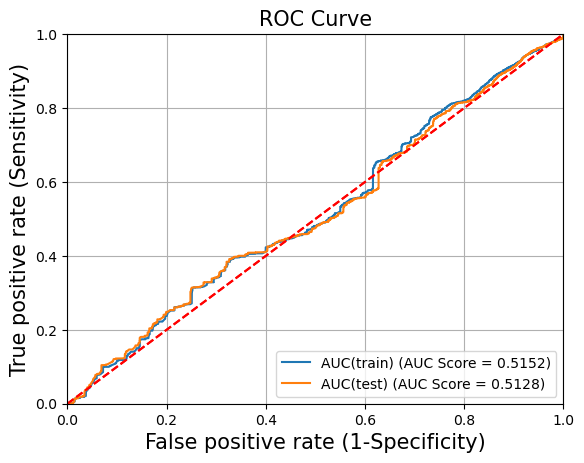

In [80]:
#ROC curve
roc_plot(lr,X_train,y_train,'AUC(train)')
roc_plot(lr,X_test,y_test,'AUC(test)')
plt.show()

### Gradient Boosting Model

In [81]:
gr_model = GradientBoostingClassifier(n_estimators=100,random_state=42)
gr_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [82]:
ypred1 = gr_model.predict(X_test)
print("Testing Accuracy")
print(gr_model.score(X_test,y_test))
print("Training Accuracy")
print(gr_model.score(X_train,y_train))

Testing Accuracy
0.769775967413442
Training Accuracy
0.7735956658112346


In [83]:
print(confusion_matrix(y_test,ypred1))
print(classification_report(y_test,ypred1))

[[2252 1945]
 [ 881 7197]]
              precision    recall  f1-score   support

           0       0.72      0.54      0.61      4197
           1       0.79      0.89      0.84      8078

    accuracy                           0.77     12275
   macro avg       0.75      0.71      0.73     12275
weighted avg       0.76      0.77      0.76     12275



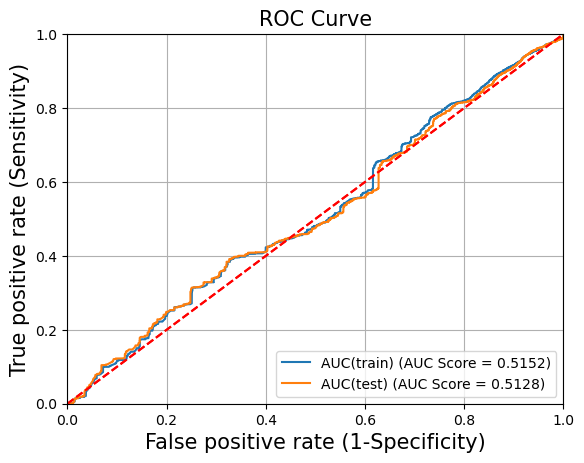

In [85]:
#ROC curve
roc_plot(gr_model,X_train,y_train,'AUC(train)')
roc_plot(gr_model,X_test,y_test,'AUC(test)')
plt.show()

#### Model Building on Open Invoice Data

In [86]:
df_open.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54817 entries, 1 to 1
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Account No   54817 non-null  float64
 1   Transaction Currency  54817 non-null  int64  
 2   Local Amount          54817 non-null  float64
 3   Transaction Class     54817 non-null  int64  
 4   USD Amount            54817 non-null  float64
 5   Payment Term days     54817 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 2.9 MB


In [87]:
df_open.head()

,Customer Account No,Transaction Currency,Local Amount,Transaction Class,USD Amount,Payment Term days
Customer Type,,,,,,
1,23152.0,2,2000.0,0,2000.0,60
1,23152.0,2,2000.0,0,2000.0,30
1,23312.0,1,2415.0,0,2415.0,-72
1,7530.0,1,3800.0,0,3800.0,58
1,7530.0,1,1264.0,0,1264.0,58


In [88]:
df_open.rename(columns={'Customer Account No':'CUSTOMER_NUMBER'},inplace=True)

In [89]:
df_open = df_open.merge(Cust_Payment_stats[['CUSTOMER_NUMBER','Cluster']], on='CUSTOMER_NUMBER', how='left')

In [90]:
features

['USD Amount', 'PAYMENT_TERM_DAYS', 'Cluster']

In [91]:
df_open.isnull().sum()

CUSTOMER_NUMBER             0
Transaction Currency        0
Local Amount                0
Transaction Class           0
USD Amount                  0
Payment Term days           0
Cluster                 12086
dtype: int64

In [92]:
df_open['Cluster'].fillna(0, inplace=True)

In [93]:
df_open.isnull().sum()

CUSTOMER_NUMBER         0
Transaction Currency    0
Local Amount            0
Transaction Class       0
USD Amount              0
Payment Term days       0
Cluster                 0
dtype: int64

In [94]:
df_open.rename(columns={'Payment Term days': 'PAYMENT_TERM_DAYS'}, inplace=True)

In [95]:
df_open['Late Payment Probability'] = rf_classifier.predict_proba(df_open[features])[:, 1]

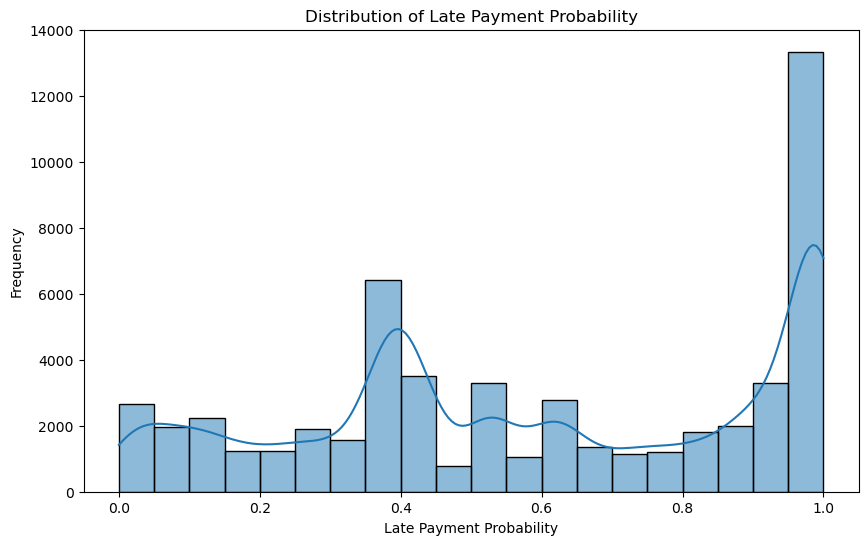

In [96]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_open, x='Late Payment Probability', bins=20, kde=True)
plt.title('Distribution of Late Payment Probability')
plt.xlabel('Late Payment Probability')
plt.ylabel('Frequency')
plt.show()

In [97]:
high_risk_customers = df_open[df_open['Late Payment Probability'] > 0.5]
print("\nHigh Risk Customers for Precautionary Measures:",high_risk_customers.max())


High Risk Customers for Precautionary Measures: CUSTOMER_NUMBER             54925.0
Transaction Currency            5.0
Local Amount                13010.0
Transaction Class               0.0
USD Amount                   6403.0
PAYMENT_TERM_DAYS             149.0
Cluster                         2.0
Late Payment Probability        1.0
dtype: float64
